<center><img src="../imgs/crocus-logo.png" alt="CROCUS Logo" style="width: 800px;"/></center>

# Urban Heat Island Data with Pandas
---

## Overview
1. Introduction to pandas data structures
1. How to slice and dice pandas dataframes and dataseries
1. How to use pandas for urban heat island analysis

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Python Quickstart](../../foundations/quickstart) | Necessary | Intro to `dict` |
| [Numpy Basics](../numpy/numpy-basics) | Necessary | |

* **Time to learn**: 60 minutes

---

## Imports

You will often see the nickname `pd` used as an abbreviation for pandas in the import statement, just like `numpy` is often imported as `np`.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

## The pandas [`DataFrame`](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)...
...is a **labeled**, two-dimensional columnar structure, similar to a table, spreadsheet, or the R `data.frame`.

![dataframe schematic](https://github.com/pandas-dev/pandas/raw/main/doc/source/_static/schemas/01_table_dataframe.svg "Schematic of a pandas DataFrame")

The `columns` that make up our `DataFrame` can be lists, dictionaries, NumPy arrays, pandas `Series`, or many other data types not mentioned here. Within these `columns`, you can have data values of many different data types used in Python and NumPy, including text, numbers, and dates/times. The first column of a `DataFrame`, shown in the image above in dark gray, is uniquely referred to as an `index`; this column contains information characterizing each row of our `DataFrame`. Similar to any other `column`, the `index` can label rows by text, numbers, datetime objects, and many other data types. Datetime objects are a quite popular way to label rows.

For our first example using Pandas DataFrames, we start by reading in some data in comma-separated value (`.csv`) format. This dataset contains temperature measurements across the Chicago metropolitan area. For more information on this dataset, review the description [here](https://data.ess-dive.lbl.gov/view/doi:10.15485/2482533).

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    As described above, we are retrieving the datasets for these examples from an urban heat island dataset, a DOE funded project called CROCUS. The urban integrated field laboratory deployed instruments around the City of Chicago, Illinois and surrounding metropoloitan area to study weather, air quality, and the impact of the built environment on the natural environment. We have pre-aggregated the dataset, including three field sites.
</div>

In [2]:
filepath = "../data/chicago-urban-heat-island.csv"

Once we have a valid path to a data file that Pandas knows how to read, we can open it, as shown in the following example:

In [3]:
df = pd.read_csv(filepath)
df

,timestamp,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
0,2024-07-26 19:00:00-05:00,25.300000,24.400000,25.2
1,2024-07-26 19:01:00-05:00,25.266667,24.400000,25.2
2,2024-07-26 19:02:00-05:00,25.166667,24.366667,25.2
3,2024-07-26 19:03:00-05:00,25.100000,24.300000,25.1
4,2024-07-26 19:04:00-05:00,25.133333,24.300000,25.0
...,...,...,...,...
2515,2024-07-28 12:55:00-05:00,27.100000,27.066667,27.2
2516,2024-07-28 12:56:00-05:00,27.100000,27.033333,27.2
2517,2024-07-28 12:57:00-05:00,27.100000,27.000000,27.2
2518,2024-07-28 12:58:00-05:00,27.133333,27.000000,27.4


If we print out our `DataFrame`, it will render as text by default, in a tabular-style ASCII output, as shown in the following example. However, if you are using a Jupyter notebook, there exists a better way to print `DataFrames`, as described below.

In [4]:
print(df)

                      timestamp  urban_parking_lot_temperature  \
0     2024-07-26 19:00:00-05:00                      25.300000   
1     2024-07-26 19:01:00-05:00                      25.266667   
2     2024-07-26 19:02:00-05:00                      25.166667   
3     2024-07-26 19:03:00-05:00                      25.100000   
4     2024-07-26 19:04:00-05:00                      25.133333   
...                         ...                            ...   
2515  2024-07-28 12:55:00-05:00                      27.100000   
2516  2024-07-28 12:56:00-05:00                      27.100000   
2517  2024-07-28 12:57:00-05:00                      27.100000   
2518  2024-07-28 12:58:00-05:00                      27.133333   
2519  2024-07-28 12:59:00-05:00                      27.200000   

      urban_park_temperature  suburban_rural_temperature  
0                  24.400000                        25.2  
1                  24.400000                        25.2  
2                  24.366667  

As described above, there is a better way to print Pandas `DataFrames`. If you are using a Jupyter notebook, you can run a code cell containing the `DataFrame` object name, by itself, and it will display a nicely rendered table, as shown below.

In [5]:
df

,timestamp,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
0,2024-07-26 19:00:00-05:00,25.300000,24.400000,25.2
1,2024-07-26 19:01:00-05:00,25.266667,24.400000,25.2
2,2024-07-26 19:02:00-05:00,25.166667,24.366667,25.2
3,2024-07-26 19:03:00-05:00,25.100000,24.300000,25.1
4,2024-07-26 19:04:00-05:00,25.133333,24.300000,25.0
...,...,...,...,...
2515,2024-07-28 12:55:00-05:00,27.100000,27.066667,27.2
2516,2024-07-28 12:56:00-05:00,27.100000,27.033333,27.2
2517,2024-07-28 12:57:00-05:00,27.100000,27.000000,27.2
2518,2024-07-28 12:58:00-05:00,27.133333,27.000000,27.4


The `DataFrame` index, as described above, contains information characterizing rows; each row has a unique ID value, which is displayed in the index column.  By default, the IDs for rows in a `DataFrame` are represented as sequential integers, which start at 0.

In [6]:
df.index

RangeIndex(start=0, stop=2520, step=1)

At the moment, the index column of our `DataFrame` is not very helpful for humans. However, Pandas has clever ways to make index columns more human-readable. The next example demonstrates how to use optional keyword arguments to convert `DataFrame` index IDs to a human-friendly datetime format.

In [7]:
df = pd.read_csv(filepath, index_col=0, parse_dates=True)

df

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
timestamp,,,
2024-07-26 19:00:00-05:00,25.300000,24.400000,25.2
2024-07-26 19:01:00-05:00,25.266667,24.400000,25.2
2024-07-26 19:02:00-05:00,25.166667,24.366667,25.2
2024-07-26 19:03:00-05:00,25.100000,24.300000,25.1
2024-07-26 19:04:00-05:00,25.133333,24.300000,25.0
...,...,...,...
2024-07-28 12:55:00-05:00,27.100000,27.066667,27.2
2024-07-28 12:56:00-05:00,27.100000,27.033333,27.2
2024-07-28 12:57:00-05:00,27.100000,27.000000,27.2


In [8]:
df.index

DatetimeIndex(['2024-07-26 19:00:00-05:00', '2024-07-26 19:01:00-05:00',
               '2024-07-26 19:02:00-05:00', '2024-07-26 19:03:00-05:00',
               '2024-07-26 19:04:00-05:00', '2024-07-26 19:05:00-05:00',
               '2024-07-26 19:06:00-05:00', '2024-07-26 19:07:00-05:00',
               '2024-07-26 19:08:00-05:00', '2024-07-26 19:09:00-05:00',
               ...
               '2024-07-28 12:50:00-05:00', '2024-07-28 12:51:00-05:00',
               '2024-07-28 12:52:00-05:00', '2024-07-28 12:53:00-05:00',
               '2024-07-28 12:54:00-05:00', '2024-07-28 12:55:00-05:00',
               '2024-07-28 12:56:00-05:00', '2024-07-28 12:57:00-05:00',
               '2024-07-28 12:58:00-05:00', '2024-07-28 12:59:00-05:00'],
              dtype='datetime64[ns, UTC-05:00]', name='timestamp', length=2520, freq=None)

Each of our data rows is now helpfully labeled by a datetime-object-like index value; this means that we can now easily identify data values not only by named columns, but also by date labels on rows. This is a sneak preview of the `DatetimeIndex` functionality of Pandas; this functionality enables a large portion of Pandas' timeseries-related usage. Don't worry; `DatetimeIndex` will be discussed in full detail later on this page. In the meantime, let's look at the columns of data read in from the `.csv` file:

In [9]:
df.columns

Index(['urban_parking_lot_temperature', 'urban_park_temperature',
       'suburban_rural_temperature'],
      dtype='object')

## The pandas [`Series`](https://pandas.pydata.org/docs/user_guide/dsintro.html#series)...

...is essentially any one of the columns of our `DataFrame`. A `Series` also includes the index column from the source `DataFrame`, in order to provide a label for each value in the `Series`.

![pandas Series](https://github.com/pandas-dev/pandas/raw/main/doc/source/_static/schemas/01_table_series.svg "Schematic of a pandas Series")

The pandas `Series` is a fast and capable 1-dimensional array of nearly any data type we could want, and it can behave very similarly to a NumPy `ndarray` or a Python `dict`. You can take a look at any of the `Series` that make up your `DataFrame`, either by using its column name and the Python `dict` notation, or by using dot-shorthand with the column name:

In [10]:
df["suburban_rural_temperature"]

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
                             ... 
2024-07-28 12:55:00-05:00    27.2
2024-07-28 12:56:00-05:00    27.2
2024-07-28 12:57:00-05:00    27.2
2024-07-28 12:58:00-05:00    27.4
2024-07-28 12:59:00-05:00    27.5
Name: suburban_rural_temperature, Length: 2520, dtype: float64

<div class="alert alert-block alert-info">
<b>Tip:</b> You can also use the dot notation illustrated below to specify a column name, but this syntax is mostly provided for convenience. For the most part, this notation is interchangeable with the dictionary notation; however, if the column name is not a valid Python identifier (e.g., it starts with a number or space), you cannot use dot notation.</div>

In [11]:
df.suburban_rural_temperature

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
                             ... 
2024-07-28 12:55:00-05:00    27.2
2024-07-28 12:56:00-05:00    27.2
2024-07-28 12:57:00-05:00    27.2
2024-07-28 12:58:00-05:00    27.4
2024-07-28 12:59:00-05:00    27.5
Name: suburban_rural_temperature, Length: 2520, dtype: float64

## Slicing and Dicing the `DataFrame` and `Series`

In this section, we will expand on topics covered in the previous sections on this page. One of the most important concepts to learn about Pandas is that it allows you to _**access anything by its associated label**_, regardless of data organization structure.

### Indexing a `Series`

As a review of previous examples, we'll start our next example by pulling a `Series` out of our `DataFrame` using its column label.

In [12]:
suburban_series = df["suburban_rural_temperature"]

suburban_series

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
                             ... 
2024-07-28 12:55:00-05:00    27.2
2024-07-28 12:56:00-05:00    27.2
2024-07-28 12:57:00-05:00    27.2
2024-07-28 12:58:00-05:00    27.4
2024-07-28 12:59:00-05:00    27.5
Name: suburban_rural_temperature, Length: 2520, dtype: float64

You can use syntax similar to that of NumPy `ndarrays` to index, select, and subset with Pandas `Series`, as shown in this example:

In [13]:
suburban_series[0]

/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_73812/3332820004.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  suburban_series[0]


np.float64(25.2)

In [14]:
suburban_series

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
                             ... 
2024-07-28 12:55:00-05:00    27.2
2024-07-28 12:56:00-05:00    27.2
2024-07-28 12:57:00-05:00    27.2
2024-07-28 12:58:00-05:00    27.4
2024-07-28 12:59:00-05:00    27.5
Name: suburban_rural_temperature, Length: 2520, dtype: float64

You can also use labels alongside Python dictionary syntax to perform the same operations:

In [15]:
suburban_series["2024-07-26T19:00"]

np.float64(25.2)

You can probably figure out some ways to extend these indexing methods, as shown in the following examples:

In [16]:
suburban_series[0:12]

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
2024-07-26 19:05:00-05:00    25.0
2024-07-26 19:06:00-05:00    25.0
2024-07-26 19:07:00-05:00    25.0
2024-07-26 19:08:00-05:00    24.9
2024-07-26 19:09:00-05:00    24.9
2024-07-26 19:10:00-05:00    24.9
2024-07-26 19:11:00-05:00    24.8
Name: suburban_rural_temperature, dtype: float64

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Index-based slices are <b>exclusive</b> of the final value, similar to Python's usual indexing rules.
</div>

However, there are many more ways to index a `Series`. The following example shows a powerful and useful indexing method:

In [17]:
suburban_series["2024-07-26T19:00":"2024-07-26T20:00"]

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
                             ... 
2024-07-26 19:56:00-05:00    22.7
2024-07-26 19:57:00-05:00    22.7
2024-07-26 19:58:00-05:00    22.6
2024-07-26 19:59:00-05:00    22.5
2024-07-26 20:00:00-05:00    22.4
Name: suburban_rural_temperature, Length: 61, dtype: float64

This is an example of label-based slicing. With label-based slicing, Pandas will automatically find a range of values based on the labels you specify.

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    As opposed to index-based slices, label-based slices are <b>inclusive</b> of the final value.
</div>

If you already have some knowledge of xarray, you will quite likely know how to create `slice` objects by hand. This can also be used in pandas, as shown below.  If you are completely unfamiliar with xarray, it will be covered on a [later Pythia tutorial page](../xarray).

In [18]:
suburban_series[slice("2024-07-26T19:00", "2024-07-26T20:00")]

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
                             ... 
2024-07-26 19:56:00-05:00    22.7
2024-07-26 19:57:00-05:00    22.7
2024-07-26 19:58:00-05:00    22.6
2024-07-26 19:59:00-05:00    22.5
2024-07-26 20:00:00-05:00    22.4
Name: suburban_rural_temperature, Length: 61, dtype: float64

### Using `.iloc` and `.loc` to index

In this section, we introduce ways to access data that are preferred by Pandas over the methods listed above. When accessing by label, it is preferred to use the `.loc` method, and when accessing by index, the `.iloc` method is preferred. These methods behave similarly to the notation introduced above, but provide more speed, security, and rigor in your value selection. Using these methods can also help you avoid [chained assignment warnings](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy) generated by pandas.

In [19]:
suburban_series.iloc[3]

np.float64(25.1)

In [20]:
suburban_series.iloc[0:12]

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
2024-07-26 19:05:00-05:00    25.0
2024-07-26 19:06:00-05:00    25.0
2024-07-26 19:07:00-05:00    25.0
2024-07-26 19:08:00-05:00    24.9
2024-07-26 19:09:00-05:00    24.9
2024-07-26 19:10:00-05:00    24.9
2024-07-26 19:11:00-05:00    24.8
Name: suburban_rural_temperature, dtype: float64

In [21]:
suburban_series.loc["2024-07-26T19:00"]

np.float64(25.2)

In [22]:
suburban_series.loc["2024-07-26T19:00":"2024-07-26T20:00"]

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
                             ... 
2024-07-26 19:56:00-05:00    22.7
2024-07-26 19:57:00-05:00    22.7
2024-07-26 19:58:00-05:00    22.6
2024-07-26 19:59:00-05:00    22.5
2024-07-26 20:00:00-05:00    22.4
Name: suburban_rural_temperature, Length: 61, dtype: float64

### Extending to the `DataFrame`

These subsetting capabilities can also be used in a full `DataFrame`; however, if you use the same syntax, there are issues, as shown below:

In [23]:
df["2024-07-26T19:00"]

KeyError: '2024-07-26T19:00'

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Attempting to use <code>Series</code> subsetting with a <code>DataFrame</code> can crash your program. A proper way to subset a <code>DataFrame</code> is shown below.
</div>

When indexing a `DataFrame`, pandas will not assume as readily the intention of your code. In this case, using a row label by itself will not work; **with `DataFrames`, labels are used for identifying columns**.

In [24]:
df["suburban_rural_temperature"]

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
                             ... 
2024-07-28 12:55:00-05:00    27.2
2024-07-28 12:56:00-05:00    27.2
2024-07-28 12:57:00-05:00    27.2
2024-07-28 12:58:00-05:00    27.4
2024-07-28 12:59:00-05:00    27.5
Name: suburban_rural_temperature, Length: 2520, dtype: float64

As shown below, you also cannot subset columns in a `DataFrame` using integer indices:

In [25]:
df[0]

KeyError: 0

From earlier examples, we know that we can use an index or label with a `DataFrame` to pull out a column as a `Series`, and we know that we can use an index or label with a `Series` to pull out a single value.  Therefore, by chaining brackets, we can pull any individual data value out of the `DataFrame`.

In [26]:
df["suburban_rural_temperature"]["2024-07-26T19:00"]

np.float64(25.2)

In [27]:
df["suburban_rural_temperature"][0]

/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_73812/603665387.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["suburban_rural_temperature"][0]


np.float64(25.2)

However, subsetting data using this chained-bracket technique is not preferred by Pandas. As described above, Pandas prefers us to use the `.loc` and `.iloc` methods for subsetting.  In addition, these methods provide a clearer, more efficient way to extract specific data from a `DataFrame`, as illustrated below:

In [28]:
df.loc["2024-07-26T19:00", "suburban_rural_temperature"]

np.float64(25.2)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    When using this syntax to pull individual data values from a DataFrame, make sure to list the row first, and then the column.
</div>

The `.loc` and `.iloc` methods also allow us to pull entire rows out of a `DataFrame`, as shown in these examples:

In [29]:
df.loc["2024-07-26T19:00"]

urban_parking_lot_temperature    25.3
urban_park_temperature           24.4
suburban_rural_temperature       25.2
Name: 2024-07-26 19:00:00-05:00, dtype: float64

In [30]:
df.loc["2024-07-26T19:00":"2024-07-26T20:00"]

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
timestamp,,,
2024-07-26 19:00:00-05:00,25.300000,24.400000,25.2
2024-07-26 19:01:00-05:00,25.266667,24.400000,25.2
2024-07-26 19:02:00-05:00,25.166667,24.366667,25.2
2024-07-26 19:03:00-05:00,25.100000,24.300000,25.1
2024-07-26 19:04:00-05:00,25.133333,24.300000,25.0
...,...,...,...
2024-07-26 19:56:00-05:00,24.166667,23.833333,22.7
2024-07-26 19:57:00-05:00,24.100000,23.900000,22.7
2024-07-26 19:58:00-05:00,24.133333,23.900000,22.6


In [31]:
df.iloc[3]

urban_parking_lot_temperature    25.1
urban_park_temperature           24.3
suburban_rural_temperature       25.1
Name: 2024-07-26 19:03:00-05:00, dtype: float64

In [32]:
df.iloc[0:12]

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
timestamp,,,
2024-07-26 19:00:00-05:00,25.300000,24.400000,25.2
2024-07-26 19:01:00-05:00,25.266667,24.400000,25.2
2024-07-26 19:02:00-05:00,25.166667,24.366667,25.2
2024-07-26 19:03:00-05:00,25.100000,24.300000,25.1
2024-07-26 19:04:00-05:00,25.133333,24.300000,25.0
2024-07-26 19:05:00-05:00,25.233333,24.300000,25.0
2024-07-26 19:06:00-05:00,25.333333,24.300000,25.0
2024-07-26 19:07:00-05:00,25.400000,24.300000,25.0
2024-07-26 19:08:00-05:00,25.400000,24.300000,24.9


In the next example, we illustrate how you can use slices of rows and lists of columns to create a smaller `DataFrame` out of an existing `DataFrame`:

In [33]:
df.loc[
    "2024-07-27T00:00":"2024-07-28T00:00",  # slice of rows
    ["urban_parking_lot_temperature", "urban_park_temperature", "suburban_rural_temperature"],  # list of columns
]

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
timestamp,,,
2024-07-27 00:00:00-05:00,23.0,22.966667,17.5
2024-07-27 00:01:00-05:00,23.1,22.900000,17.5
2024-07-27 00:02:00-05:00,23.1,22.900000,17.5
2024-07-27 00:03:00-05:00,23.1,22.900000,17.5
2024-07-27 00:04:00-05:00,23.1,22.900000,17.5
...,...,...,...
2024-07-27 23:56:00-05:00,25.1,24.800000,20.7
2024-07-27 23:57:00-05:00,25.1,24.800000,20.7
2024-07-27 23:58:00-05:00,25.1,24.800000,20.7


<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    There are certain limitations to these subsetting techniques. For more information on these limitations, as well as a comparison of <code>DataFrame</code> and <code>Series</code> indexing methods, see the <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Pandas indexing documentation.</a>
</div>

## Exploratory Data Analysis

### Get a Quick Look at the Beginning/End of your `DataFrame`
Pandas also gives you a few shortcuts to quickly investigate entire `DataFrames`. The `head` method shows the first five rows of a `DataFrame`, and the `tail` method shows the last five rows of a `DataFrame`.

In [34]:
df.head()

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
timestamp,,,
2024-07-26 19:00:00-05:00,25.300000,24.400000,25.2
2024-07-26 19:01:00-05:00,25.266667,24.400000,25.2
2024-07-26 19:02:00-05:00,25.166667,24.366667,25.2
2024-07-26 19:03:00-05:00,25.100000,24.300000,25.1
2024-07-26 19:04:00-05:00,25.133333,24.300000,25.0


In [35]:
df.tail()

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
timestamp,,,
2024-07-28 12:55:00-05:00,27.100000,27.066667,27.2
2024-07-28 12:56:00-05:00,27.100000,27.033333,27.2
2024-07-28 12:57:00-05:00,27.100000,27.000000,27.2
2024-07-28 12:58:00-05:00,27.133333,27.000000,27.4
2024-07-28 12:59:00-05:00,27.200000,27.066667,27.5


### Quick Plots of Your Data
A good way to explore your data is by making a simple plot. Pandas contains its own `plot` method; this allows us to plot Pandas series without needing `matplotlib`.  In this example, we plot the `urban_park_temperature` series of our `df` `DataFrame` in this way:

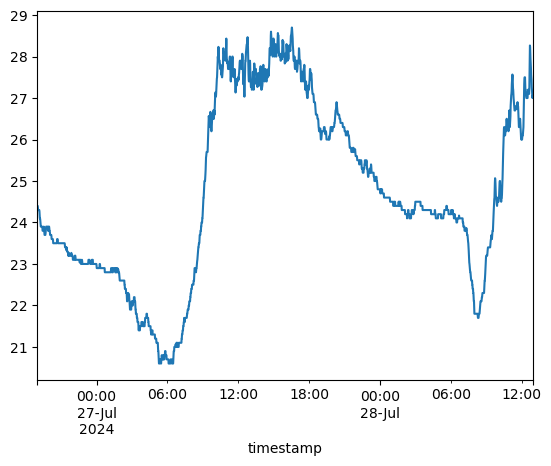

In [36]:
df.urban_park_temperature.plot();

Before, we called `.plot()`, which generated a single line plot. Line plots can be helpful for understanding some types of data, but there are other types of data that can be better understood with different plot types. For example, if your data values form a distribution, you can better understand them using a histogram plot.

The code for plotting histogram data differs in two ways from the code above for the line plot. First, two series are being used from the `DataFrame` instead of one.  Second, after calling the `plot` method, we call an additional method called `hist`, which converts the plot into a histogram.

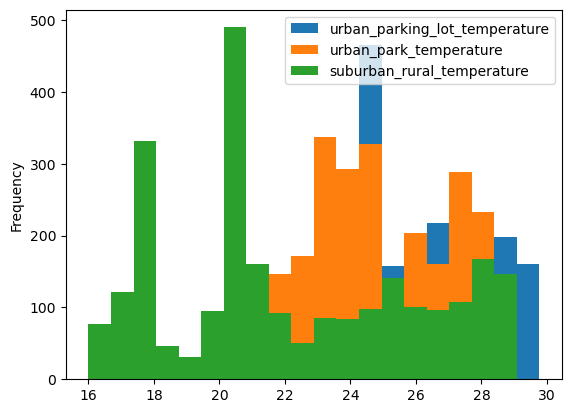

In [65]:
df[['urban_parking_lot_temperature',
    'urban_park_temperature', 
    'suburban_rural_temperature']].plot.hist(bins=20);

The histogram plot helped us better understand our data; there are clear differences in the distributions, with the urban parking lot having slightly warmer extreme temperatures than the park location, and the suburban location with much lower values. To even better understand this type of data, it may also be helpful to create a box plot. This can be done using the same line of code, with one change: we call the `box` method instead of `hist`.

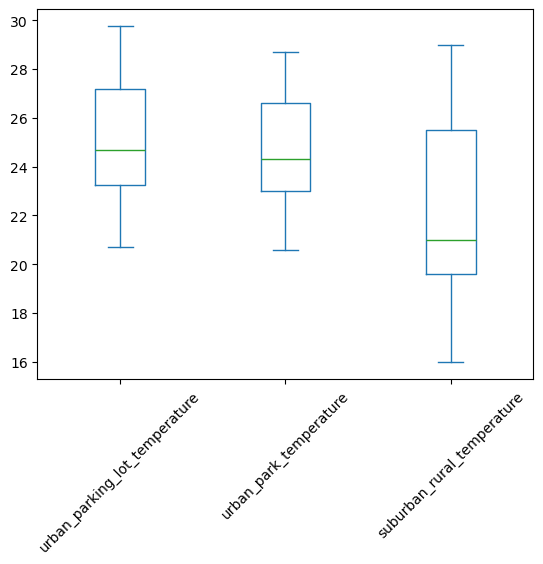

In [70]:
df[['urban_parking_lot_temperature',
    'urban_park_temperature', 
    'suburban_rural_temperature']].plot.box(rot=45);

Just like the histogram plot, this box plot indicates a clear difference in the distributions. Using multiple types of plot in this way can be useful for verifying large datasets. The pandas plotting methods are capable of creating many different types of plots. To see how to use the plotting methods to generate each type of plot, please review the [pandas plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

#### Customize your Plot
The pandas plotting methods are, in fact, wrappers for similar methods in matplotlib. This means that you can customize pandas plots by including keyword arguments to the plotting methods.  These keyword arguments, for the most part, are equivalent to their matplotlib counterparts.

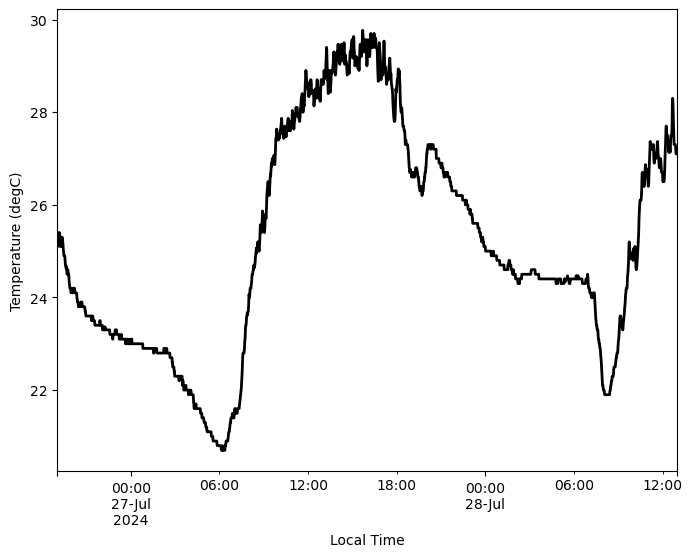

In [39]:
df.urban_parking_lot_temperature.plot(
    color='black',
    linewidth=2,
    xlabel='Local Time',
    ylabel='Temperature (degC)',
    figsize=(8, 6),
);

Although plotting data can provide a clear visual picture of data values, sometimes a more quantitative look at data is warranted. As elaborated on in the next section, this can be achieved using the `describe` method.  The `describe` method is called on the entire `DataFrame`, and returns various summarized statistics for each column in the `DataFrame`.
### Basic Statistics

We can garner statistics for a `DataFrame` by using the `describe` method. When this method is called on a `DataFrame`, a set of statistics is returned in tabular format.  The columns match those of the `DataFrame`, and the rows indicate different statistics, such as minimum.

In [40]:
df.describe()

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
count,2520.000000,2520.000000,2520.00000
mean,25.181997,24.703479,22.22119
std,2.396415,2.170161,3.79821
min,20.700000,20.600000,16.00000
25%,23.258333,23.000000,19.60000
50%,24.666667,24.300000,21.00000
75%,27.200000,26.600000,25.50000
max,29.766667,28.700000,29.00000


You can also view specific statistics using corresponding methods. In this example, we look at the mean values in the entire `DataFrame`, using the `mean` method.  When such methods are called on the entire `DataFrame`, a `Series` is returned. The indices of this `Series` are the column names in the `DataFrame`, and the values are the calculated values (in this case, mean values) for the `DataFrame` columns.

In [41]:
df.mean()

urban_parking_lot_temperature    25.181997
urban_park_temperature           24.703479
suburban_rural_temperature       22.221190
dtype: float64

If you want a specific statistic for only one column in the `DataFrame`, pull the column out of the `DataFrame` with dot notation, then call the statistic function (in this case, mean) on that column, as shown below:

In [42]:
df.urban_parking_lot_temperature.mean()

np.float64(25.181997354497355)

### Subsetting Using the Datetime Column

Slicing is a useful technique for subsetting a `DataFrame`, but there are also other options that can be equally useful. In this section, some of these additional techniques are covered.

If your `DataFrame` uses datetime values for indices, you can select data from only one month using `df.index.hour`. In this example, we specify the number 12, which only selects data from noon to 1 PM.

In [43]:
# Uses the datetime column
df[df.index.hour == 12]

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature
timestamp,,,
2024-07-27 12:00:00-05:00,28.533333,27.500000,27.5
2024-07-27 12:01:00-05:00,28.533333,27.433333,27.5
2024-07-27 12:02:00-05:00,28.366667,27.466667,27.6
2024-07-27 12:03:00-05:00,28.333333,27.566667,27.6
2024-07-27 12:04:00-05:00,28.366667,27.600000,27.5
...,...,...,...
2024-07-28 12:55:00-05:00,27.100000,27.066667,27.2
2024-07-28 12:56:00-05:00,27.100000,27.033333,27.2
2024-07-28 12:57:00-05:00,27.100000,27.000000,27.2


This example shows how to create a new column containing the month portion of the datetime index for each data row. The value returned by `df.index.hour` is used to obtain the data for this new column:

In [44]:
df['hour'] = df.index.hour

This next example illustrates how to use the new month column to calculate average monthly values over the other data columns. First, we use the `groupby` method to group the other columns by the hour.  Second, we take the average (mean) to obtain the hourly averages. Finally, we plot the resulting data as a line plot by simply calling `plot()`.

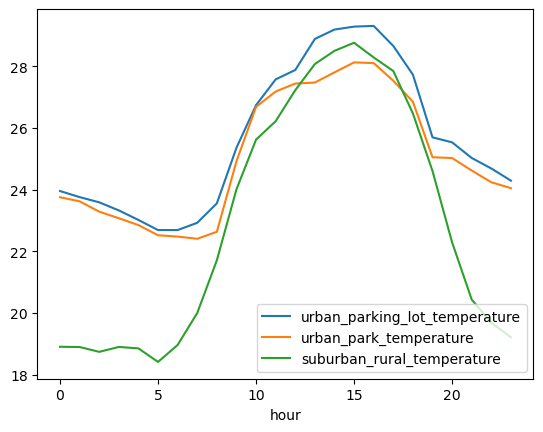

In [45]:
df.groupby('hour').mean().plot();

### Investigating Extreme Values

Let's start by calculating an "urban heat island factor", where we compare the temperature in the city, our urban sites, to the rural site. We will call it a "temperature anomaly", where it is our difference between the city temperature and the rural/suburban temperature.

<Axes: xlabel='timestamp'>

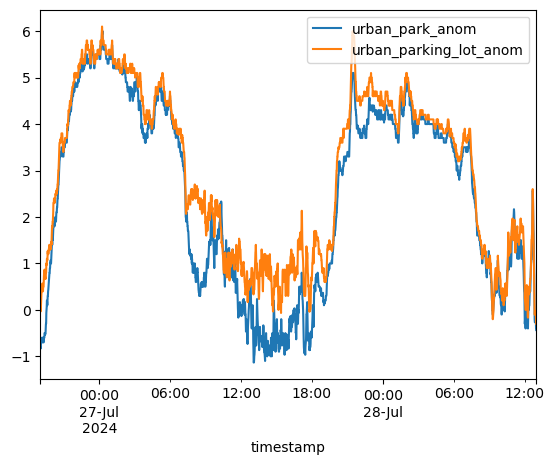

In [46]:
df["urban_park_anom"]  = df.urban_park_temperature - df.suburban_rural_temperature
df["urban_parking_lot_anom"] =  df.urban_parking_lot_temperature - df.suburban_rural_temperature

# Plot a quick plot of the data
df[["urban_park_anom", "urban_parking_lot_anom"]].plot()

If you need to search for rows that meet a specific criterion, you can use **conditional indexing**.  In this example, we search for rows where the Nino34 anomaly value (`urban_parking_lot_anom`) is greater than 5, meaning the city is 5 degrees Celsius warmer than the suburban/rural site:

In [47]:
df[df.urban_parking_lot_anom > 5]

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature,hour,urban_park_anom,urban_parking_lot_anom
timestamp,,,,,,
2024-07-26 21:54:00-05:00,23.5,23.200000,18.4,21,4.800000,5.1
2024-07-26 21:55:00-05:00,23.5,23.200000,18.4,21,4.800000,5.1
2024-07-26 21:57:00-05:00,23.4,23.200000,18.3,21,4.900000,5.1
2024-07-26 21:58:00-05:00,23.4,23.200000,18.3,21,4.900000,5.1
2024-07-26 21:59:00-05:00,23.4,23.166667,18.3,21,4.866667,5.1
...,...,...,...,...,...,...
2024-07-28 01:54:00-05:00,24.6,24.300000,19.6,1,4.700000,5.0
2024-07-28 01:59:00-05:00,24.5,24.300000,19.4,1,4.900000,5.1
2024-07-28 02:00:00-05:00,24.5,24.300000,19.4,2,4.900000,5.1


Notice how our largest difference is during the overnight hours - which makes physical sense as the city maintains its heat due to a lack of radiational cooling. The following graphic from the Environmental Protection Agency (EPA) highlights this concept well:
![heat-island-effect](../imgs/heat_island_effect_diagram.jpg)

More information here - https://www.epa.gov/heatislands/what-are-heat-islands

This example shows how to use the `sort_values` method on a `DataFrame`. This method sorts values in a `DataFrame` by the column specified as an argument.

In [48]:
df.sort_values('urban_parking_lot_anom')

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature,hour,urban_park_anom,urban_parking_lot_anom
timestamp,,,,,,
2024-07-28 12:59:00-05:00,27.200000,27.066667,27.5,12,-0.433333,-0.300000
2024-07-28 12:58:00-05:00,27.133333,27.000000,27.4,12,-0.400000,-0.266667
2024-07-28 09:18:00-05:00,23.300000,23.400000,23.5,9,-0.100000,-0.200000
2024-07-28 09:19:00-05:00,23.300000,23.400000,23.5,9,-0.100000,-0.200000
2024-07-28 12:17:00-05:00,27.533333,27.300000,27.7,12,-0.400000,-0.166667
...,...,...,...,...,...,...
2024-07-27 00:16:00-05:00,23.000000,23.000000,17.0,0,6.000000,6.000000
2024-07-27 00:15:00-05:00,23.000000,22.933333,17.0,0,5.933333,6.000000
2024-07-27 00:13:00-05:00,23.000000,22.900000,17.0,0,5.900000,6.000000


You can also reverse the ordering of the sort by specifying the `ascending` keyword argument as `False`:

In [49]:
df.sort_values('urban_parking_lot_anom', ascending=False)

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature,hour,urban_park_anom,urban_parking_lot_anom
timestamp,,,,,,
2024-07-27 00:14:00-05:00,23.000000,22.900000,16.9,0,6.000000,6.100000
2024-07-27 00:13:00-05:00,23.000000,22.900000,17.0,0,5.900000,6.000000
2024-07-27 00:15:00-05:00,23.000000,22.933333,17.0,0,5.933333,6.000000
2024-07-27 21:27:00-05:00,26.700000,25.800000,20.7,21,5.100000,6.000000
2024-07-27 00:16:00-05:00,23.000000,23.000000,17.0,0,6.000000,6.000000
...,...,...,...,...,...,...
2024-07-28 12:17:00-05:00,27.533333,27.300000,27.7,12,-0.400000,-0.166667
2024-07-28 09:18:00-05:00,23.300000,23.400000,23.5,9,-0.100000,-0.200000
2024-07-28 09:19:00-05:00,23.300000,23.400000,23.5,9,-0.100000,-0.200000


### Resampling
In these examples, we illustrate a process known as resampling. Using resampling, you can change the frequency of index data values, reducing so-called 'noise' in a data plot. This is especially useful when working with timeseries data; plots can be equally effective with resampled data in these cases. The resampling performed in these examples converts minute values to hourly averages. This is performed by passing the value '1H' to the `resample` method.

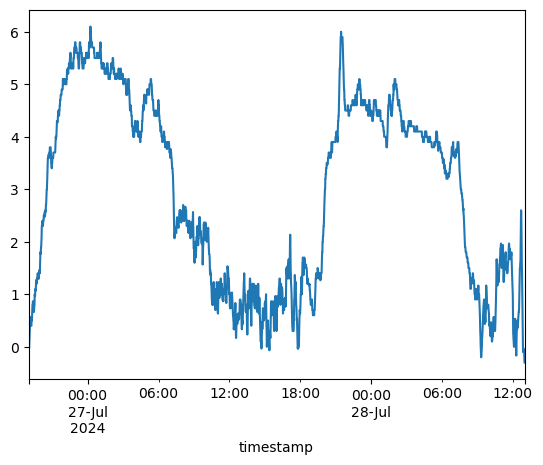

In [50]:
df.urban_parking_lot_anom.plot();

/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_73812/249350787.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.urban_parking_lot_anom.resample('1H').mean().plot();


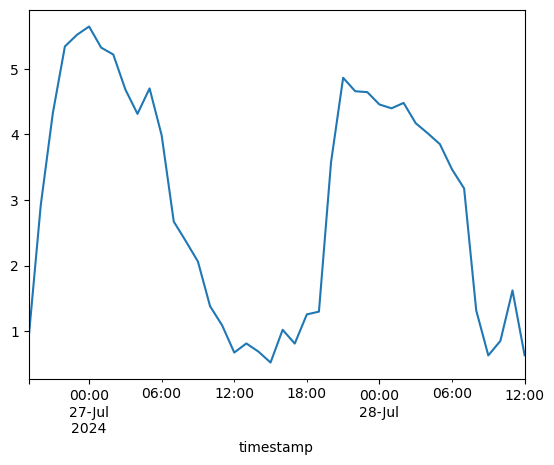

In [51]:
df.urban_parking_lot_anom.resample('1H').mean().plot();

### Applying operations to a DataFrame

One of the most commonly used features in Pandas is the performing of calculations to multiple data values in a `DataFrame` simultaneously. Let's first look at a familiar concept: a function that converts single values.  The following example uses such a function to convert temperature values from degrees Celsius to Kelvin.

In [52]:
def convert_degc_to_degf(temperature_degc):
    """
    Converts from degrees celsius to fahrenheit
    """

    return (temperature_degc * 9/5) + 32

In [53]:
# Convert a single value
convert_degc_to_degf(0)

32.0

The following examples instead illustrate a new concept: using such functions with `DataFrames` and `Series`. For the first example, we start by creating a `Series`; in order to do so, we subset the `DataFrame` by the `suburban_rural_temperature` column. This has already been done earlier in this page; we do not need to create this `Series` again. We are using this particular `Series` for a reason: the data values are in degrees Celsius.

In [54]:
suburban_series

timestamp
2024-07-26 19:00:00-05:00    25.2
2024-07-26 19:01:00-05:00    25.2
2024-07-26 19:02:00-05:00    25.2
2024-07-26 19:03:00-05:00    25.1
2024-07-26 19:04:00-05:00    25.0
                             ... 
2024-07-28 12:55:00-05:00    27.2
2024-07-28 12:56:00-05:00    27.2
2024-07-28 12:57:00-05:00    27.2
2024-07-28 12:58:00-05:00    27.4
2024-07-28 12:59:00-05:00    27.5
Name: suburban_rural_temperature, Length: 2520, dtype: float64

Here, we look at a portion of an existing `DataFrame` column. Notice that this column portion is a Pandas `Series`.

In [55]:
type(df.suburban_rural_temperature[0:10])

pandas.core.series.Series

As shown in the following example, each Pandas `Series` contains a representation of its data in numpy format. Therefore, it is possible to convert a Pandas `Series` into a numpy array; this is done using the `.values` method:

In [56]:
type(df.suburban_rural_temperature.values[0:10])

numpy.ndarray

This example illustrates how to use the temperature-conversion function defined above on a `Series` object. Just as calling the function with a single value returns a single value, calling the function on a `Series` object returns another `Series` object. The function performs the temperature conversion on each data value in the `Series`, and returns a `Series` with all values converted.

In [57]:
convert_degc_to_degf(suburban_series)

timestamp
2024-07-26 19:00:00-05:00    77.36
2024-07-26 19:01:00-05:00    77.36
2024-07-26 19:02:00-05:00    77.36
2024-07-26 19:03:00-05:00    77.18
2024-07-26 19:04:00-05:00    77.00
                             ...  
2024-07-28 12:55:00-05:00    80.96
2024-07-28 12:56:00-05:00    80.96
2024-07-28 12:57:00-05:00    80.96
2024-07-28 12:58:00-05:00    81.32
2024-07-28 12:59:00-05:00    81.50
Name: suburban_rural_temperature, Length: 2520, dtype: float64

If we call the `.values` method on the `Series` passed to the function, the `Series` is converted to a numpy array, as described above. The function then converts each value in the numpy array, and returns a new numpy array with all values sorted.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    It is recommended to only convert <code>Series</code> to NumPy arrays when necessary; doing so removes the label information that enables much of the Pandas core functionality.
</div>

In [58]:
convert_degc_to_degf(suburban_series.values)

array([77.36, 77.36, 77.36, ..., 80.96, 81.32, 81.5 ], shape=(2520,))

As described above, when our temperature-conversion function accepts a `Series` as an argument, it returns a `Series`. We can directly assign this returned `Series` to a new column in our `DataFrame`, as shown below:

In [59]:
df['urban_parking_lot_temperature_degF'] = convert_degc_to_degf(df.urban_parking_lot_temperature)
df['urban_park_temperature_degF'] = convert_degc_to_degf(df.urban_park_temperature)
df["suburban_rural_temperature_degF"]  = convert_degc_to_degf(df.suburban_rural_temperature)

We can add a quick plot of the data here.

<Axes: xlabel='timestamp'>

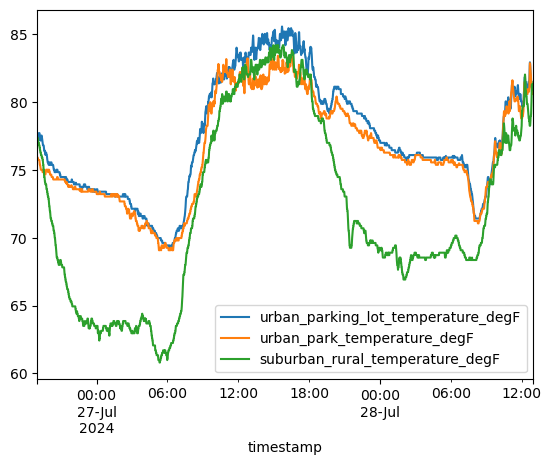

In [60]:
df[["urban_parking_lot_temperature_degF", "urban_park_temperature_degF", "suburban_rural_temperature_degF"]].plot()

In this final example, we demonstrate the use of the `to_csv` method to save a `DataFrame` as a `.csv` file. This example also demonstrates the `read_csv` method, which reads `.csv` files into Pandas `DataFrames`.

In [61]:
df.to_csv('urban_heat_island_analyzed_output.csv')

In [62]:
pd.read_csv('urban_heat_island_analyzed_output.csv', index_col=0, parse_dates=True)

,urban_parking_lot_temperature,urban_park_temperature,suburban_rural_temperature,hour,urban_park_anom,urban_parking_lot_anom,urban_parking_lot_temperature_degF,urban_park_temperature_degF,suburban_rural_temperature_degF
timestamp,,,,,,,,,
2024-07-26 19:00:00-05:00,25.300000,24.400000,25.2,19,-0.800000,1.000000e-01,77.54,75.92,77.36
2024-07-26 19:01:00-05:00,25.266667,24.400000,25.2,19,-0.800000,6.666667e-02,77.48,75.92,77.36
2024-07-26 19:02:00-05:00,25.166667,24.366667,25.2,19,-0.833333,-3.333333e-02,77.30,75.86,77.36
2024-07-26 19:03:00-05:00,25.100000,24.300000,25.1,19,-0.800000,3.552714e-15,77.18,75.74,77.18
2024-07-26 19:04:00-05:00,25.133333,24.300000,25.0,19,-0.700000,1.333333e-01,77.24,75.74,77.00
...,...,...,...,...,...,...,...,...,...
2024-07-28 12:55:00-05:00,27.100000,27.066667,27.2,12,-0.133333,-1.000000e-01,80.78,80.72,80.96
2024-07-28 12:56:00-05:00,27.100000,27.033333,27.2,12,-0.166667,-1.000000e-01,80.78,80.66,80.96
2024-07-28 12:57:00-05:00,27.100000,27.000000,27.2,12,-0.200000,-1.000000e-01,80.78,80.60,80.96


---
## Summary
* Pandas is a very powerful tool for working with tabular (i.e., spreadsheet-style) data
* There are multiple ways of subsetting your pandas dataframe or series
* Pandas allows you to refer to subsets of data by label, which generally makes code more readable and more robust
* Pandas can be helpful for exploratory data analysis, including plotting and basic statistics
* One can apply calculations to pandas dataframes and save the output via `csv` files

## Resources and References
1. [CROCUS Data Used for this notebook](https://data.ess-dive.lbl.gov/view/doi:10.15485/2482533)
1. [Getting Started with Pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
1. [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)